In [1]:
import random as rn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams

## Setting Parameters

In [2]:
winp = 18.0/37
#rn.seed(2)

initial_budget = 1000 # Initial budget
min_bet = 2.5 # Minimum bet  
max_bet = 100 # Max bet   # 2.5, 5, 10, 20, 40 = 77.5..
spins = 10000 # Number of spins

bet_after = 2 # Bet after how many consecutive Reds

bet = [] # Bet
total_budget = [] # Current budget

## Spin

In [3]:
def record_creation(spins):
    recordList = [] #result list

    for i in range(spins):        
        numnum = rn.randint(0, 36)
        if numnum == 0:
            recordList.append('Green')
        elif (1<= numnum <= 18): 
            recordList.append("Red") # Nobody cares about the actual color of each number
        else:
            recordList.append("Black")
    return recordList

## Sequence & bet function

In [4]:
def minirecordlistfun(recordList):
    minirecordlist=[]
    for j in range(len(recordList)):    
        if j>=3:
            a0=recordList[j-3]
            a=recordList[j-2]
            b=recordList[j-1]
            c=recordList[j]
            minirecordlist_temp=[a0,a,b,c]
            minirecordlist.append(minirecordlist_temp)
    return minirecordlist

In [5]:
# WinLose function
def Win_or_Lose(initial_budget, max_bet, spins, min_bet,recordList):
    
    money = initial_budget
    output =[]
    bet_size=min_bet
    minirecordlist=minirecordlistfun(recordList)
    
    for i in range(spins):
        if i<4:
            pass
        else:
            if minirecordlist[i-4]==['Black','Black','Black','Black']:
                if money <= 0:
                    pass
                elif recordList[i]=='Red':
                    money += bet_size
                    bet_size = min_bet
                    output.append(money)
                else:
                    money -= bet_size
                    bet_size = np.min((2 * bet_size, max_bet))
                    if bet_size == max_bet:
                        bet_size = min_bet
                    if bet_size > money:
                        bet_size = money
                    output.append(money)

    return output

## Simulation!

Only 38.0% of bettors have postive resutls after an average of 547.74 bets and 10000 spins


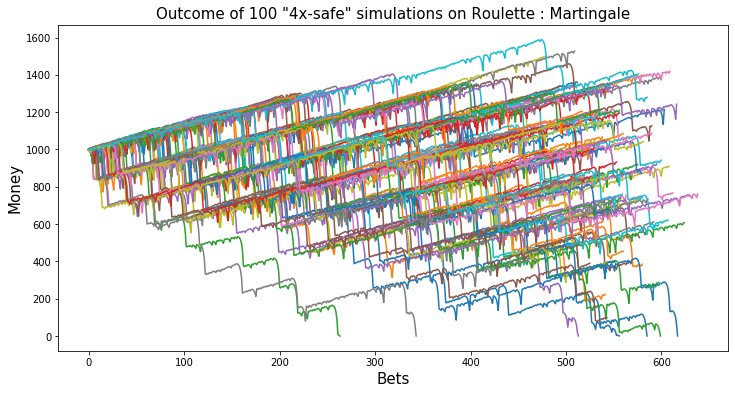

In [6]:
plt.figure(figsize=(12,6))
num_simulations=100
win_counter=0
numberofbets=[]

for n in range(num_simulations):
    recordList=record_creation(spins)
    simu=Win_or_Lose(initial_budget, max_bet, spins, min_bet,recordList)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),spins))

plt.title('Outcome of {} "4x-safe" simulations on Roulette : Martingale'.format(num_simulations), fontsize=15)
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Failed_Experiment.pdf', bbox_inches='tight')
plt.show()

## Scaling

In [7]:
def bet_scaling(initial_bet,max_bet,power):
    bet=[]
    bet.append(initial_bet)
    for i in range(10):
        if bet[i]*(1.5**power)<float(max_bet):
            bet.append(bet[i]*(1.5**power))
        else:
            break
    return bet

## Simulation Pt II : Scaling trials

In [8]:
# WinLose function : Custom Betting Scale
def Win_or_Lose_Custom(initial_budget, max_bet, spins, min_bet,recordList,custom_bet_scale):
    
    money = initial_budget
    output =[]
    bet_size=min_bet
    minirecordlist=minirecordlistfun(recordList)
    
    for i in range(spins):
        if i<4:
            pass
        else:
            if minirecordlist[i-4]==['Black','Black','Black','Black']:
                count=0
                if money <= 0:
                    pass
                elif recordList[i]=='Red':
                    money += bet_size
                    bet_size = min_bet
                    output.append(money)
                else:
                    money -= bet_size
                    bet_size = np.min((custom_bet_scale[count], max_bet))
                    output.append(money)
                    count+=1
                    if bet_size == max_bet:
                        bet_size = min_bet
                    if bet_size > money:
                        bet_size = money

    return output

Only 26.0% of bettors have postive resutls after an average of 562.22 bets and 10000 spins


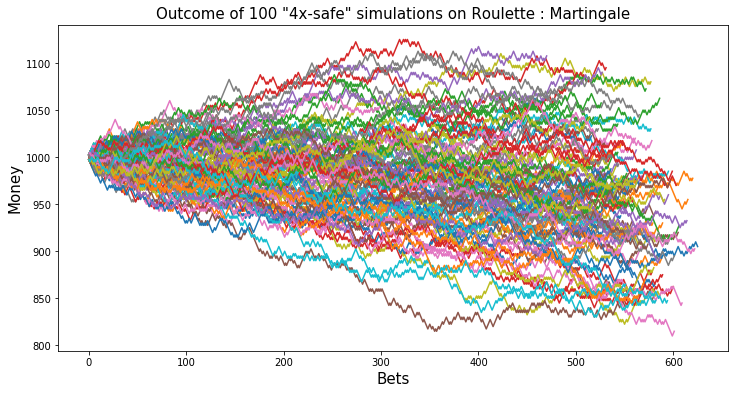

In [9]:
plt.figure(figsize=(12,6))
num_simulations=100
win_counter=0
numberofbets=[]
custom_bet_scale=bet_scaling(min_bet,max_bet,2)

for n in range(num_simulations):
    recordList=record_creation(spins)
    simu=Win_or_Lose_Custom(initial_budget, max_bet, spins, min_bet,recordList,custom_bet_scale)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),spins))

plt.title('Outcome of {} "4x-safe" simulations on Roulette : Martingale'.format(num_simulations), fontsize=15)
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Failed_Experiment.pdf', bbox_inches='tight')
plt.show()